# Explainable AI with SHAP

## Introduction

In this project, we explore the classification of drug consumption patterns using machine learning algorithms, specifically focusing on decision trees and random forests. The dataset utilized in this analysis originates from the UCI Machine Learning Repository and contains various features related to drug consumption behaviors.

The primary goal of this project is to predict whether individuals consume specific drugs (e.g., chocolate and mushrooms) based on a set of demographic and behavioral features. We will first apply a decision tree classifier to visualize the decision-making process and evaluate its accuracy. Subsequently, we will enhance our model using a random forest classifier, which aggregates multiple decision trees to improve classification performance.

This analysis aims to demonstrate the effectiveness of these machine learning techniques in handling classification tasks and to provide insights into the underlying patterns of drug consumption behaviors.

To start the vritual enviornment, runsource sklearn-env/bin/activate

## Libraries Installed

In [169]:
import ssl
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import sys
print(sys.executable)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import shap

/Users/jhaha/Documents/GitHub/Explainable-AI-with-SHAP/sklearn-env/bin/python


## Data Preprocessing

In [170]:
# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# Data as pandas DataFrames
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets

# Convert features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

user_data = df.iloc[:, 0:12]


choco = df['choc']
shrooms = df['mushrooms']


In [171]:
# take the multiple classifications and convert it into binary

choc_binary = []
mushrooms_binary = []

for i in choco:
    if i == 'CL0' or i == 'CL1':
        choc_binary.append(0)
    else:
        choc_binary.append(1)

for i in shrooms:
    if i == 'CL0' or i == 'CL1':
        mushrooms_binary.append(0)
    else:
        mushrooms_binary.append(1)

choc_binary = np.array(choc_binary)
mushrooms_binary = np.array(mushrooms_binary)
# print("X:")
# print(user_data.shape)
# print("Y:")
# print(choc_binary.shape)

X_choco_train, X_choco_test, y_choco_train, y_choco_test = train_test_split(user_data, choc_binary, test_size=0.33, random_state=42, stratify=choc_binary)
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(user_data, mushrooms_binary, test_size=0.33, random_state=42, stratify=mushrooms_binary)

# print("X choco train")
# print(X_choco_train.shape)
# print("Y choco train")
# print(y_choco_train.shape)
# print("X choco test")
# print(X_choco_test.shape)
# print("Y choco test")
# print(y_choco_test.shape)

In [172]:
# model eval function
def evaluate_model(type, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)
    ax.set_title(f"{type} Confusion Matrix for {model.__class__.__name__}")
    plt.show()
    
    return accuracy, y_pred

## Model Training and Fitting for Chocolate



In [173]:
best_choco_model = None
best_choco_accuracy = 0
worst_choco_model = None
worst_choco_accuracy = 1

DecisionTreeClassifier - Accuracy: 0.9582664526484751, Precision: 0.9802955665024631, Recall: 0.9770867430441899


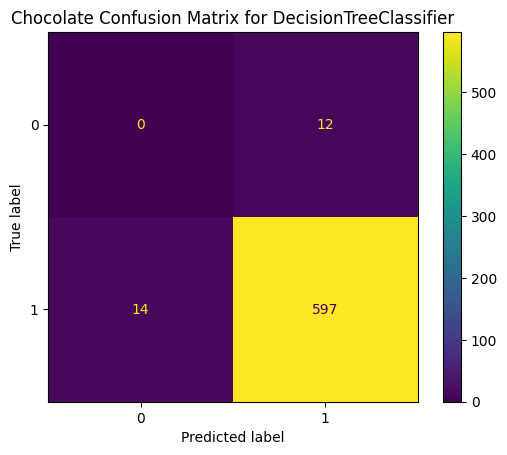

RandomForestClassifier - Accuracy: 0.9807383627608347, Precision: 0.9807383627608347, Recall: 1.0


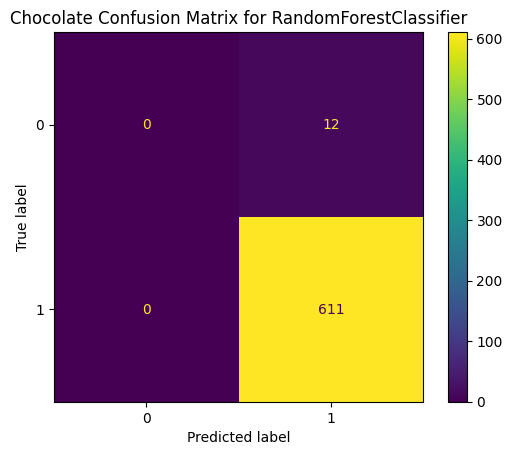

SVC - Accuracy: 0.9807383627608347, Precision: 0.9807383627608347, Recall: 1.0


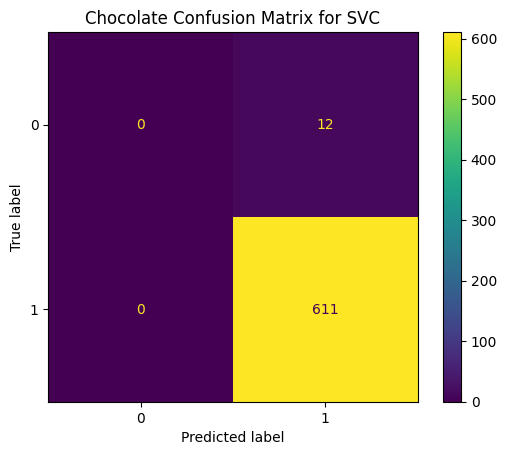

GradientBoostingClassifier - Accuracy: 0.9807383627608347, Precision: 0.9807383627608347, Recall: 1.0


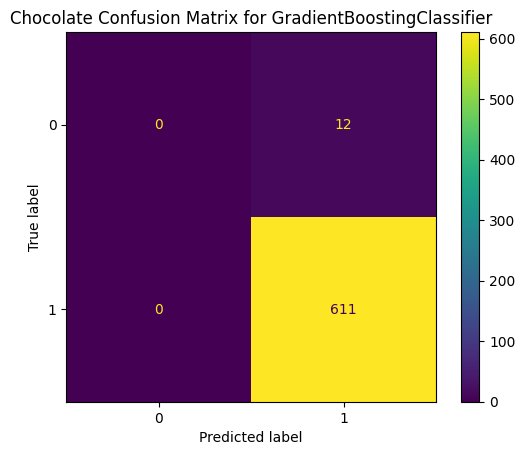

MLPClassifier - Accuracy: 0.9759229534510433, Precision: 0.9806451612903225, Recall: 0.9950900163666121


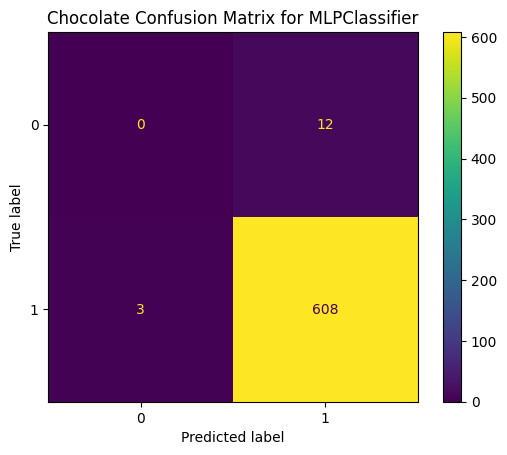

KNeighborsClassifier - Accuracy: 0.9807383627608347, Precision: 0.9822866344605475, Recall: 0.9983633387888707


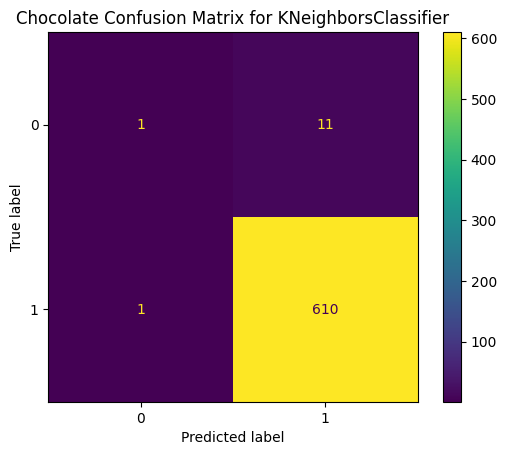

In [174]:
# Single Decision Tree
choco_tree = tree.DecisionTreeClassifier(random_state=42)
accuracy, y_tree_choco_pred = evaluate_model("Chocolate", choco_tree, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

if accuracy > best_choco_accuracy:
    best_choco_accuracy = accuracy
    best_choco_model = choco_tree

if accuracy < worst_choco_accuracy:
    worst_choco_accuracy = accuracy
    worst_choco_model = choco_tree
    
# Random Forest Learner
choco_random_forest = RandomForestClassifier(random_state=42)
accuracy, y_random_forest_choco_pred = evaluate_model("Chocolate", choco_random_forest, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

if accuracy > best_choco_accuracy:
    best_choco_accuracy = accuracy
    best_choco_model = choco_random_forest

if accuracy < worst_choco_accuracy:
    worst_choco_accuracy = accuracy
    worst_choco_model = choco_random_forest

# SVM (Support Vector Machine)
choco_svm = svm.SVC(random_state=42, probability=True)
accuracy, y_svm_choco_pred = evaluate_model("Chocolate", choco_svm, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

if accuracy > best_choco_accuracy:
    best_choco_accuracy = accuracy
    best_choco_model = choco_svm

if accuracy < worst_choco_accuracy:
    worst_choco_accuracy = accuracy
    worst_choco_model = choco_svm

# Gradient Boosting Ensemble
choco_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
accuracy, y_gb_choco_pred = evaluate_model("Chocolate", choco_gb, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

if accuracy > best_choco_accuracy:
    best_choco_accuracy = accuracy
    best_choco_model = choco_gb

if accuracy < worst_choco_accuracy:
    worst_choco_accuracy = accuracy
    worst_choco_model = choco_gb
    
# Multi-Layer Perceptron
choco_mlp = MLPClassifier(random_state=1, max_iter=500)
accuracy, y_mlp_choco_pred = evaluate_model("Chocolate", choco_mlp, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

if accuracy > best_choco_accuracy:
    best_choco_accuracy = accuracy
    best_choco_model = choco_mlp

if accuracy < worst_choco_accuracy:
    worst_choco_accuracy = accuracy
    worst_choco_model = choco_mlp
    
# K-Nearest Neighbors
choco_knn = KNeighborsClassifier(n_neighbors=3)
accuracy, y_knn_choco_pred = evaluate_model("Chocolate", choco_knn, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

if accuracy > best_choco_accuracy:
    best_choco_accuracy = accuracy
    best_choco_model = choco_knn
    
if accuracy < worst_choco_accuracy:
    worst_choco_accuracy = accuracy
    worst_choco_model = choco_knn


## ROC Curves for Chocolate

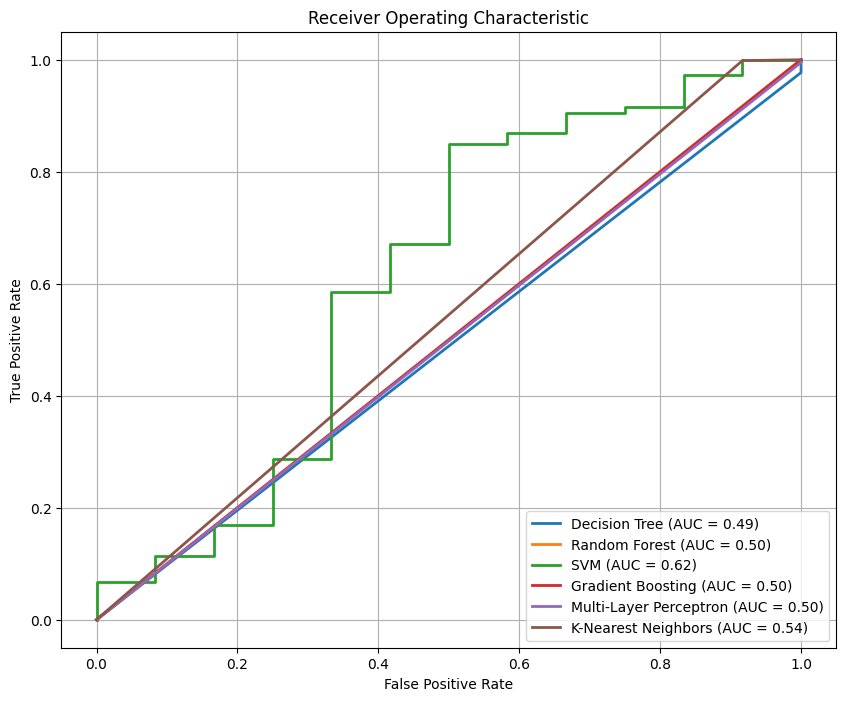

In [175]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_choco_pred,
    "Random Forest": y_random_forest_choco_pred,
    "SVM": y_svm_choco_pred,
    "Gradient Boosting": y_gb_choco_pred,
    "Multi-Layer Perceptron": y_mlp_choco_pred,
    "K-Nearest Neighbors": y_knn_choco_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = choco_svm.predict_proba(X_choco_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_choco_test, y_pred_proba)
    roc_auc = roc_auc_score(y_choco_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [176]:
print(f"Best Chocolate Model: {best_choco_model} with accuracy of {best_choco_accuracy}")
print(f"Worst Chocolate Model: {worst_choco_model} with accuracy of {worst_choco_accuracy}")

Best Chocolate Model: RandomForestClassifier(random_state=42) with accuracy of 0.9807383627608347
Worst Chocolate Model: DecisionTreeClassifier(random_state=42) with accuracy of 0.9582664526484751


## Model Training and Fitting for Mushrooms



In [177]:
best_mushroom_model = None
best_mushroom_accuracy = 0
worst_mushroom_model = None
worst_mushroom_accuracy = 1

DecisionTreeClassifier - Accuracy: 0.6902086677367576, Precision: 0.5697674418604651, Recall: 0.6419213973799127


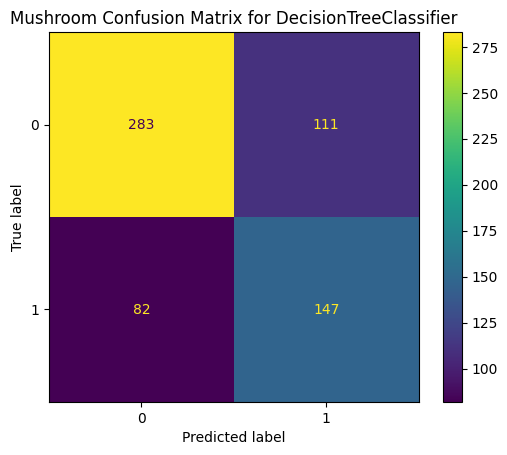

RandomForestClassifier - Accuracy: 0.7351524879614767, Precision: 0.6379310344827587, Recall: 0.6462882096069869


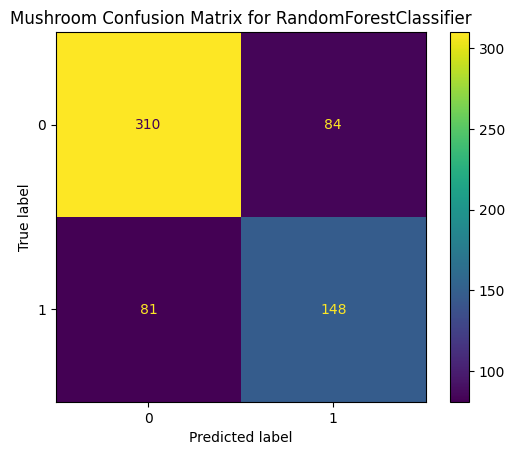

SVC - Accuracy: 0.7431781701444623, Precision: 0.648068669527897, Recall: 0.6593886462882096


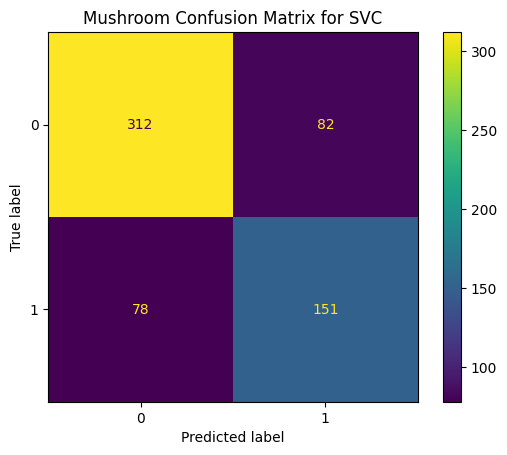

GradientBoostingClassifier - Accuracy: 0.7367576243980738, Precision: 0.6348547717842323, Recall: 0.6681222707423581


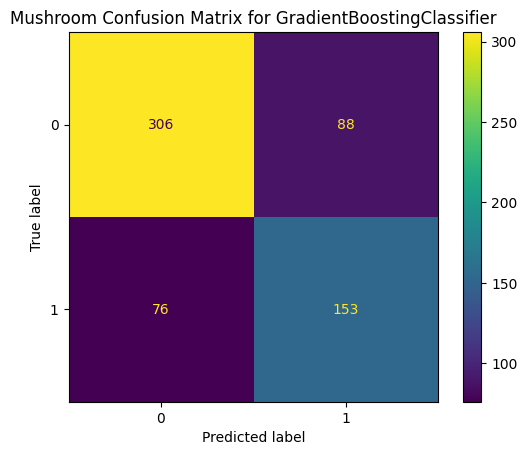

MLPClassifier - Accuracy: 0.7303370786516854, Precision: 0.6234817813765182, Recall: 0.6724890829694323


/Users/jhaha/Documents/GitHub/Explainable-AI-with-SHAP/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


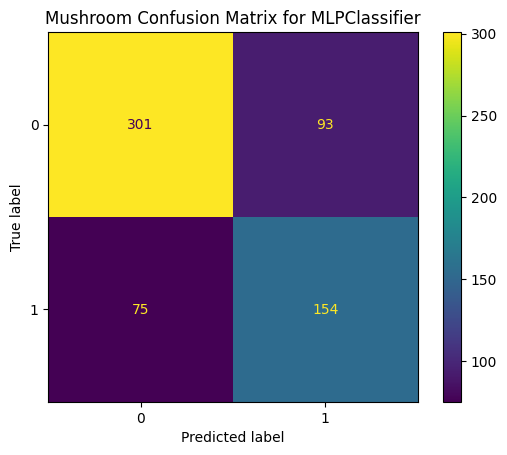

KNeighborsClassifier - Accuracy: 0.6934189406099518, Precision: 0.5811965811965812, Recall: 0.5938864628820961


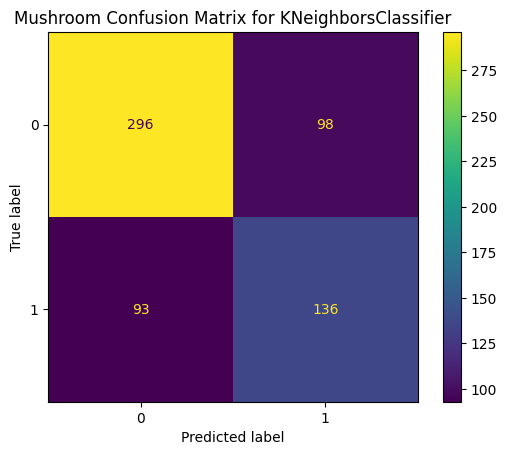

In [178]:
# Single Decision Tree
mushroom_tree = tree.DecisionTreeClassifier(random_state=42)
accuracy, y_tree_mushroom_pred = evaluate_model("Mushroom", mushroom_tree, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

if accuracy > best_mushroom_accuracy:
    best_mushroom_accuracy = accuracy
    best_mushroom_model = mushroom_tree

if accuracy < worst_mushroom_accuracy:
    worst_mushroom_accuracy = accuracy
    worst_mushroom_model = mushroom_tree
    
# Random Forest Learner
mushroom_random_forest = RandomForestClassifier(random_state=42)
accuracy, y_random_forest_mushroom_pred = evaluate_model("Mushroom", mushroom_random_forest, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

if accuracy > best_mushroom_accuracy:
    best_mushroom_accuracy = accuracy
    best_mushroom_model = mushroom_random_forest

if accuracy < worst_mushroom_accuracy:
    worst_mushroom_accuracy = accuracy
    worst_mushroom_model = mushroom_random_forest
    
# SVM (Support Vector Machine)
mushroom_svm = svm.SVC(random_state=42, probability=True)
accuracy, y_svm_mushroom_pred = evaluate_model("Mushroom", mushroom_svm, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

if accuracy > best_mushroom_accuracy:
    best_mushroom_accuracy = accuracy
    best_mushroom_model = mushroom_svm

if accuracy < worst_mushroom_accuracy:
    worst_mushroom_accuracy = accuracy
    worst_mushroom_model = mushroom_svm
    
# Gradient Boosting Ensemble
mushroom_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
accuracy, y_gb_mushroom_pred = evaluate_model("Mushroom", mushroom_gb, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

if accuracy > best_mushroom_accuracy:
    best_mushroom_accuracy = accuracy
    best_mushroom_model = mushroom_gb

if accuracy < worst_mushroom_accuracy:
    worst_mushroom_accuracy = accuracy
    worst_mushroom_model = mushroom_gb

# Multi-Layer Perceptron
mushroom_mlp = MLPClassifier(random_state=1, max_iter=500)
accuracy, y_mlp_mushroom_pred = evaluate_model("Mushroom", mushroom_mlp, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

if accuracy > best_mushroom_accuracy:
    best_mushroom_accuracy = accuracy
    best_mushroom_model = mushroom_mlp

if accuracy < worst_mushroom_accuracy:
    worst_mushroom_accuracy = accuracy
    worst_mushroom_model = mushroom_mlp
    
# K-Nearest Neighbors
mushroom_knn = KNeighborsClassifier(n_neighbors=3)
accuracy, y_knn_mushroom_pred = evaluate_model("Mushroom", mushroom_knn, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

if accuracy > best_mushroom_accuracy:
    best_mushroom_accuracy = accuracy
    best_mushroom_model = mushroom_knn
    
if accuracy < worst_mushroom_accuracy:
    worst_mushroom_accuracy = accuracy
    worst_mushroom_model = mushroom_knn

## ROC Curves for Mushrooms

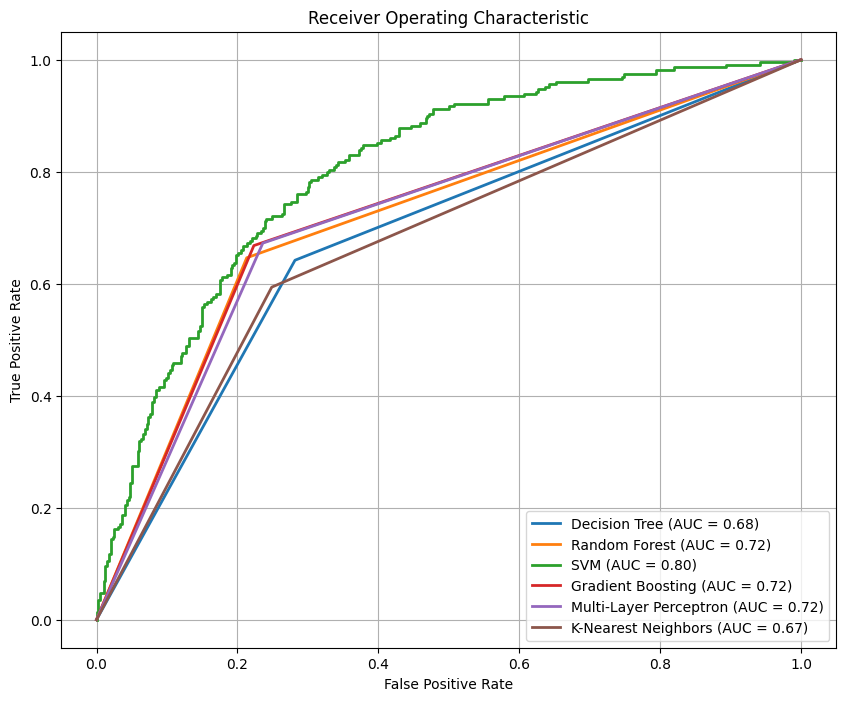

In [179]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_mushroom_pred,
    "Random Forest": y_random_forest_mushroom_pred,
    "SVM": y_svm_mushroom_pred,
    "Gradient Boosting": y_gb_mushroom_pred,
    "Multi-Layer Perceptron": y_mlp_mushroom_pred,
    "K-Nearest Neighbors": y_knn_mushroom_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = mushroom_svm.predict_proba(X_mushroom_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_mushroom_test, y_pred_proba)
    roc_auc = roc_auc_score(y_mushroom_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [180]:
print(f"Best Mushroom Model: {best_mushroom_model} with accuracy of {best_mushroom_accuracy}")
print(f"Worst Mushroom Model: {worst_mushroom_model} with accuracy of {worst_mushroom_accuracy}")

Best Mushroom Model: SVC(probability=True, random_state=42) with accuracy of 0.7431781701444623
Worst Mushroom Model: DecisionTreeClassifier(random_state=42) with accuracy of 0.6902086677367576


In [181]:
# class_idx = 1

# Chocolate test set (D1) - Best model (C1) using TreeExplainer
print("SHAP Summary for Best Chocolate Model (RandomForest - C1):")
explainer_best_choco = shap.TreeExplainer(best_choco_model)
shap_values_best_choco = explainer_best_choco.shap_values(X_choco_test)
best_choco_shap_values_1 = explainer_best_choco(X_choco_test)[:, :, 1]
best_choco_shap_values_0 = explainer_best_choco(X_choco_test)[:, :, 0]
# print(best_choco_shap_values.shape)

# Chocolate test set (D1) - Worst model (C2) using TreeExplainer
print("SHAP Summary for Worst Chocolate Model (DecisionTree - C2):")
explainer_worst_choco = shap.TreeExplainer(worst_choco_model)
worst_choco_shap_values_1 = explainer_worst_choco(X_choco_test)[:, :, 1]
worst_choco_shap_values_0 = explainer_worst_choco(X_choco_test)[:, :, 0]
# print(worst_choco_shap_values.shape)

# Magic mushroom test set (D2) - Best model (M1) using KernelExplainer for SVC
print("SHAP Summary for Best Mushroom Model (SVC - M1):")
explainer_best_mushroom = shap.KernelExplainer(best_mushroom_model.predict_proba, X_mushroom_train[:100])  # Using a sample
best_mushroom_shap_values_1 = explainer_best_mushroom(X_choco_test[:100])[:, :, 1]
best_mushroom_shap_values_0 = explainer_best_mushroom(X_choco_test[:100])[:, :, 0]
# print(best_mushroom_shap_values.shape)

# Magic mushroom test set (D2) - Worst model (M2) using TreeExplainer
print("SHAP Summary for Worst Mushroom Model (DecisionTree - M2):")
explainer_worst_mushroom = shap.TreeExplainer(worst_mushroom_model)
worst_mushroom_shap_values_1 = explainer_worst_mushroom(X_mushroom_test)[:, :, 1]
worst_mushroom_shap_values_0 = explainer_worst_mushroom(X_mushroom_test)[:, :, 0]
# print(worst_mushroom_shap_values.shape)


SHAP Summary for Best Chocolate Model (RandomForest - C1):
SHAP Summary for Worst Chocolate Model (DecisionTree - C2):
SHAP Summary for Best Mushroom Model (SVC - M1):


100%|██████████| 100/100 [08:47<00:00,  5.27s/it]

SHAP Summary for Worst Mushroom Model (DecisionTree - M2):


## SHAP Summary Plot for 4 Models

SHAP Summary for Best Chocolate Model (C1):


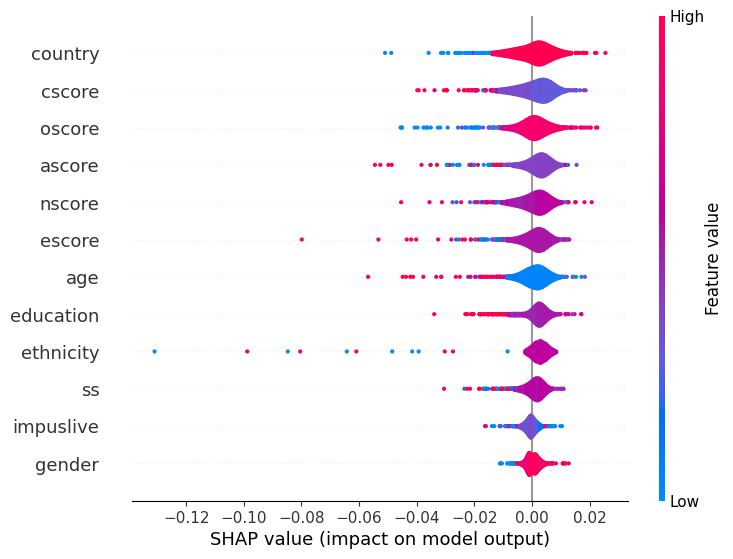

SHAP Summary for Worst Chocolate Model (C2):


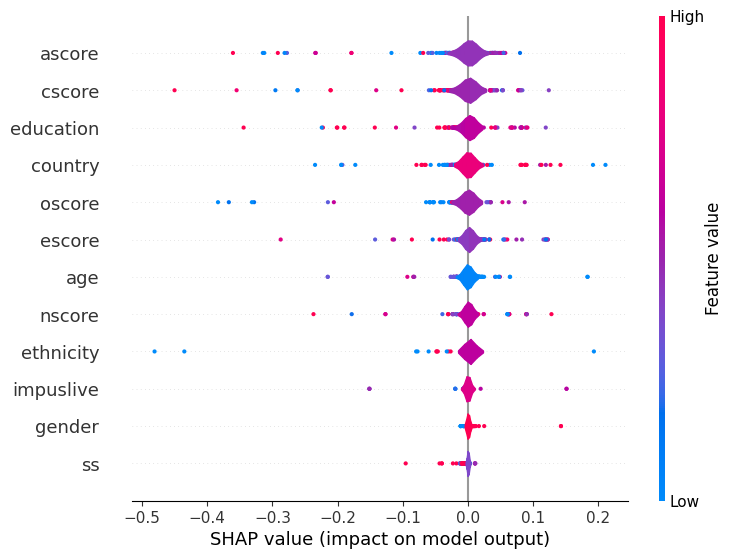

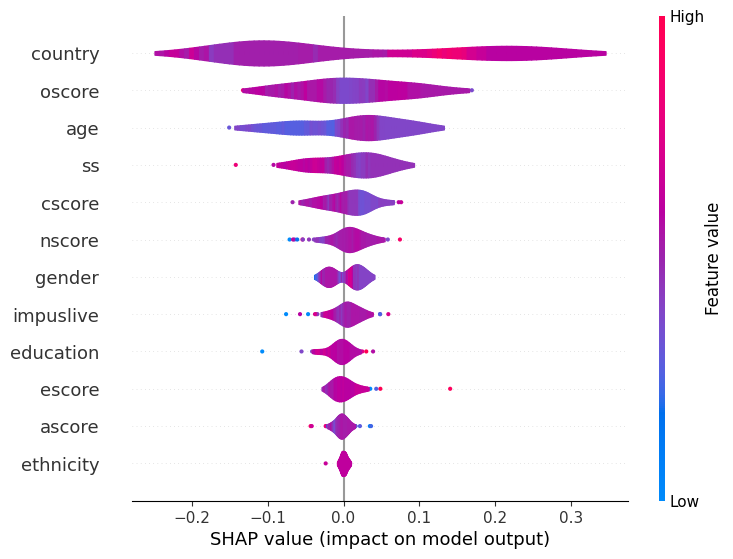

SHAP Summary for Worst Mushroom Model (M2):


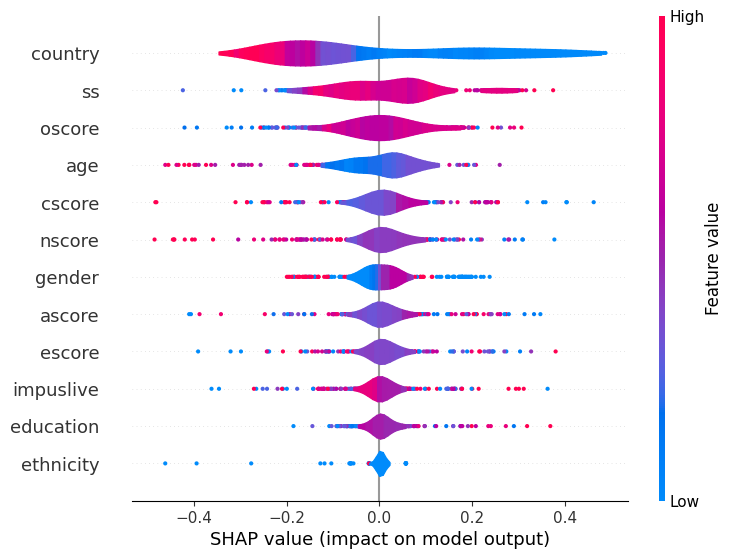

In [189]:

feature_names = X_choco_train.columns

print("SHAP Summary for Best Chocolate Model (C1):")
shap.plots.violin(best_choco_shap_values_1, features=X_choco_test, feature_names=X_choco_test.columns, plot_type="violin")


print("SHAP Summary for Worst Chocolate Model (C2):")
shap.plots.violin(worst_choco_shap_values_1, features=X_choco_test, feature_names=X_choco_test.columns, plot_type="violin")


# print("SHAP Summary for Best Mushroom Model (M1):")
shap.plots.violin(best_mushroom_shap_values_1, features=X_mushroom_test[:100], feature_names=X_mushroom_test.columns, plot_type="violin")


print("SHAP Summary for Worst Mushroom Model (M2):")
shap.plots.violin(worst_mushroom_shap_values_1, features=X_mushroom_test, feature_names=X_mushroom_test.columns, plot_type="violin")

## SHAP Force Plot for 4 Models

SHAP Summary for Best Chocolate Model (C1):


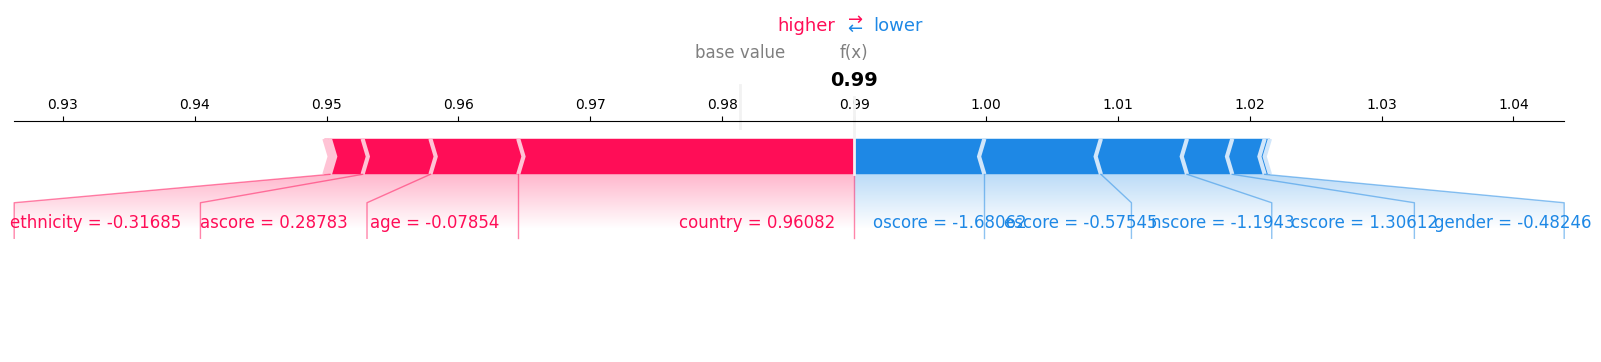

SHAP Summary for Worst Chocolate Model (C2):


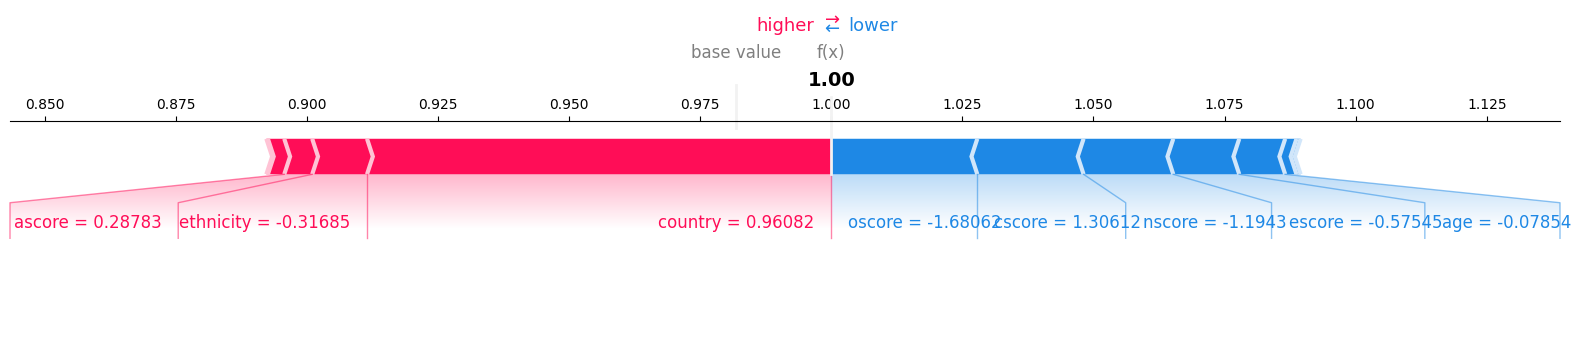

SHAP Summary for Best Mushroom Model (M1):


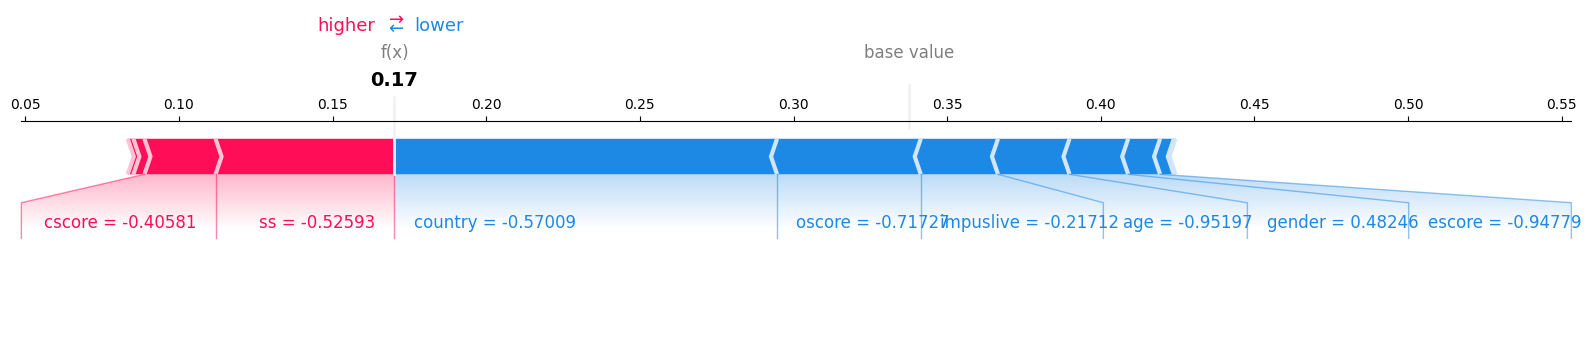

SHAP Summary for Worst Mushroom Model (M2):


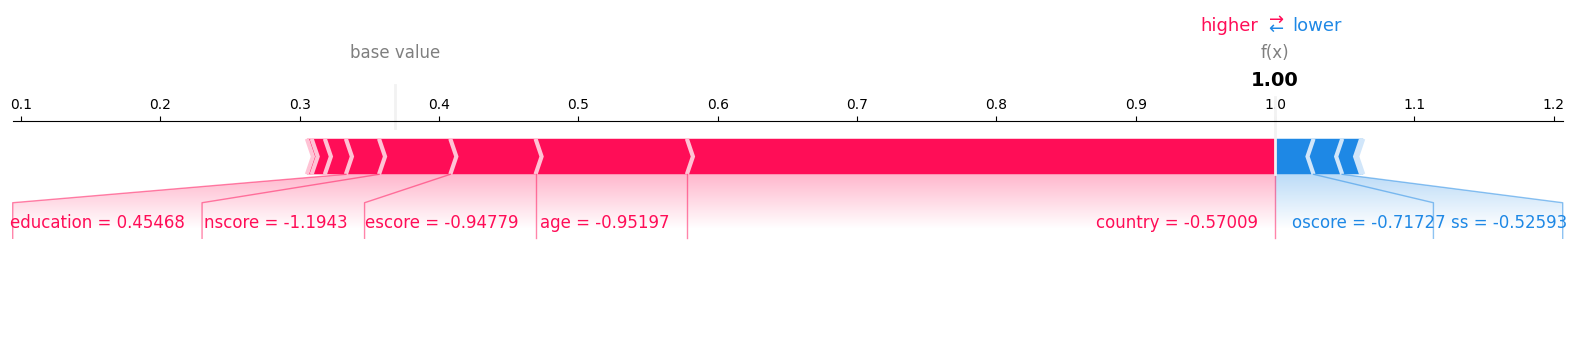

In [194]:
y_pred_best_choco = best_choco_model.predict(X_choco_test)
y_pred_worst_choco = worst_choco_model.predict(X_choco_test)
y_pred_best_mushroom = best_mushroom_model.predict(X_mushroom_test)
y_pred_worst_mushroom = worst_mushroom_model.predict(X_mushroom_test)

false_positive_idx_choco = ((y_pred_best_choco == 1) & (y_choco_test == 0) & (y_pred_worst_choco == 1) & (y_choco_test == 0))
common_false_positive_idx_choco = np.argmax(false_positive_idx_choco)

print("SHAP Summary for Best Chocolate Model (C1):")
# print(explainer_best_choco)
# print(explainer_best_choco.expected_value)
# shap.force_plot(explainer_best_choco.expected_value)
shap.plots.force(
    base_value=explainer_best_choco.expected_value[1],    
    shap_values=best_choco_shap_values_1.values[common_false_positive_idx_choco],              
    features=X_choco_test.iloc[common_false_positive_idx_choco],                      
    feature_names=X_choco_test.columns,           
    matplotlib=True
)

print("SHAP Summary for Worst Chocolate Model (C2):")
shap.plots.force(
    base_value=explainer_worst_choco.expected_value[1],    
    shap_values=worst_choco_shap_values_1.values[common_false_positive_idx_choco],              
    features=X_choco_test.iloc[common_false_positive_idx_choco],                      
    feature_names=X_choco_test.columns,           
    matplotlib=True
)

false_positive_idx_mushroom = (((y_pred_best_mushroom == 1) & (y_mushroom_test == 0) & y_pred_worst_mushroom == 1) & (y_mushroom_test == 0))
common_false_positive_idx_mushroom = np.argmax(false_positive_idx_mushroom)

print("SHAP Summary for Best Mushroom Model (M1):")
shap.plots.force(
    base_value=explainer_best_mushroom.expected_value[1],    
    shap_values=best_mushroom_shap_values_1.values[common_false_positive_idx_mushroom],              
    features=X_mushroom_test.iloc[common_false_positive_idx_mushroom],                      
    feature_names=X_mushroom_test.columns,           
    matplotlib=True
)

print("SHAP Summary for Worst Mushroom Model (M2):")
shap.plots.force(
    base_value=explainer_worst_mushroom.expected_value[1],    
    shap_values=worst_mushroom_shap_values_1.values[common_false_positive_idx_mushroom],              
    features=X_mushroom_test.iloc[common_false_positive_idx_mushroom],                      
    feature_names=X_mushroom_test.columns,           
    matplotlib=True
)


## SHAP Dependence (Interaction) Plot for 4 Models

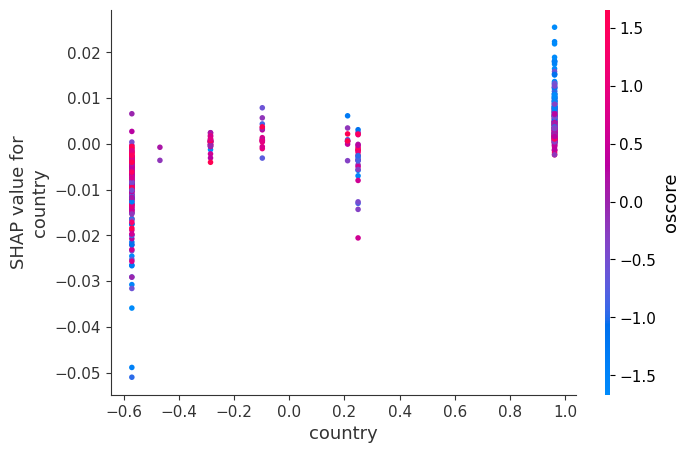

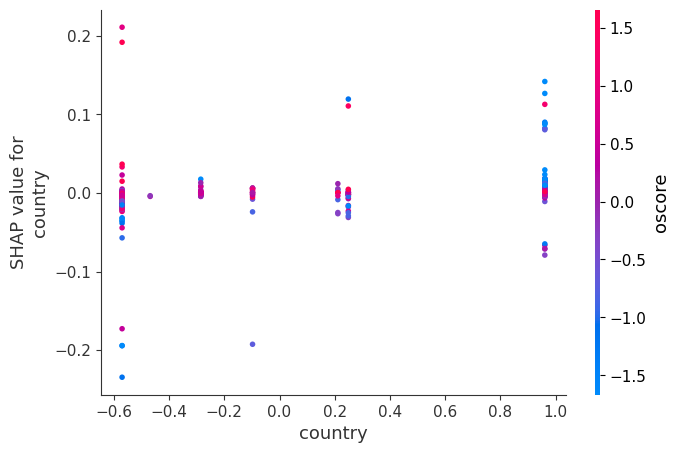

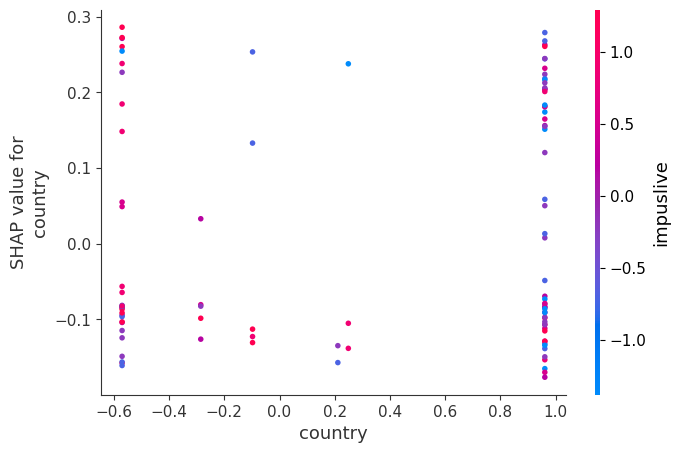

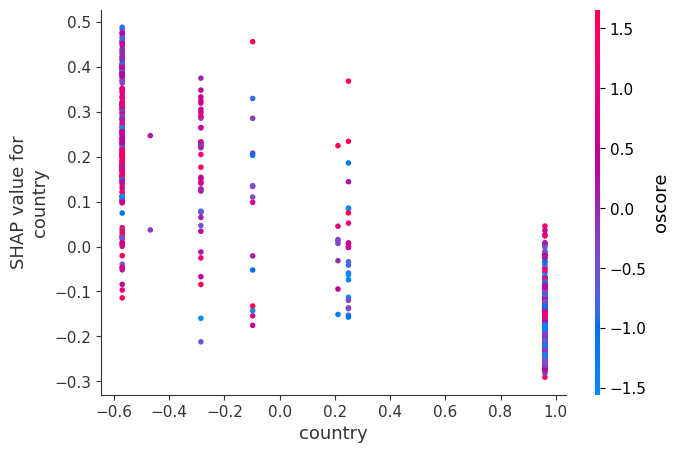

In [198]:
# Interaction Plot for Best Chocolate Model (C1)
shap.dependence_plot('country', best_choco_shap_values_1.values, X_choco_test)

# Interaction Plot for Worst Chocolate Model (C2)
shap.dependence_plot('country', worst_choco_shap_values_1.values, X_choco_test)

# # Interaction Plot for Best Mushroom Model (M1)
shap.dependence_plot('country', best_mushroom_shap_values_1.values, X_mushroom_test[:100])

# Interaction Plot for Worst Mushroom Model (M2)
shap.dependence_plot('country', worst_mushroom_shap_values_1.values, X_mushroom_test)


## SHAP Waterfall Plot for 4 Models

SHAP Summary for Best Chocolate Model (C1):


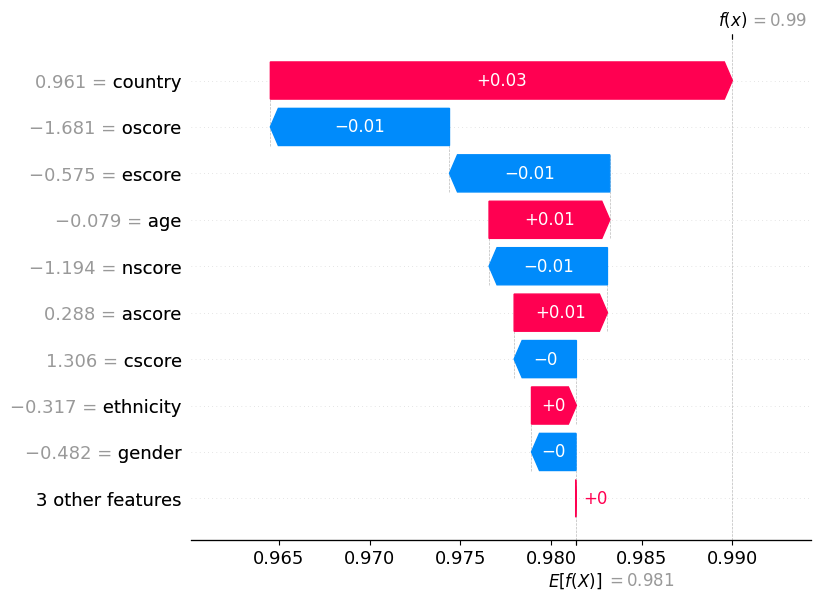

SHAP Summary for Worst Chocolate Model (C2):


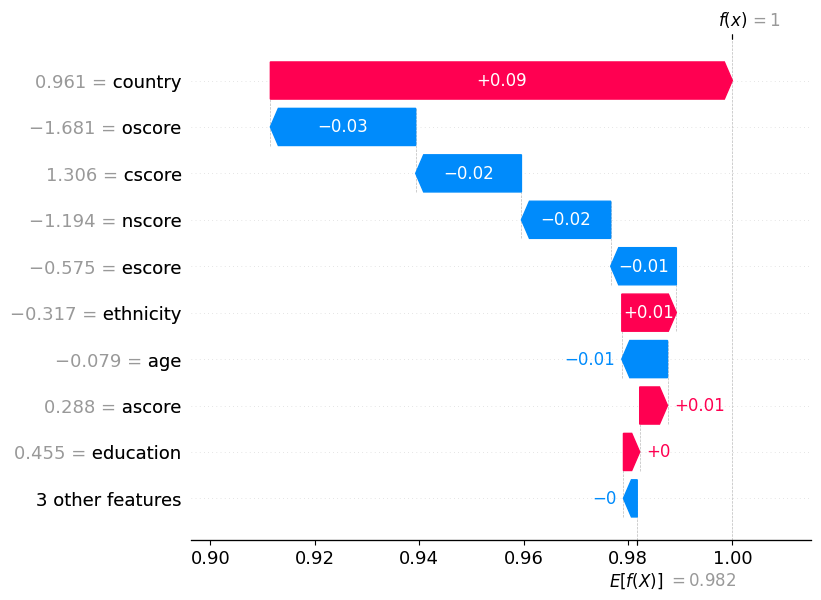

SHAP Summary for Best Mushroom Model (M1):


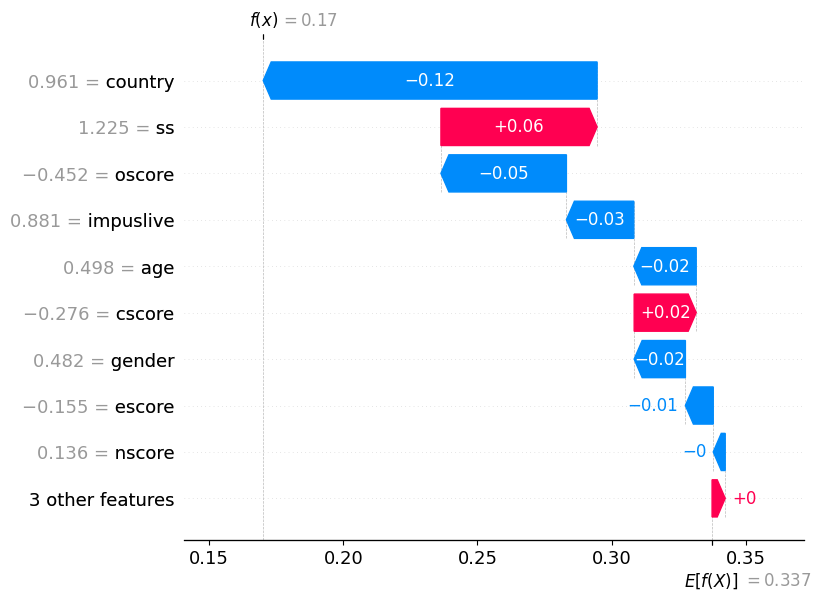

SHAP Summary for Worst Mushroom Model (M2):


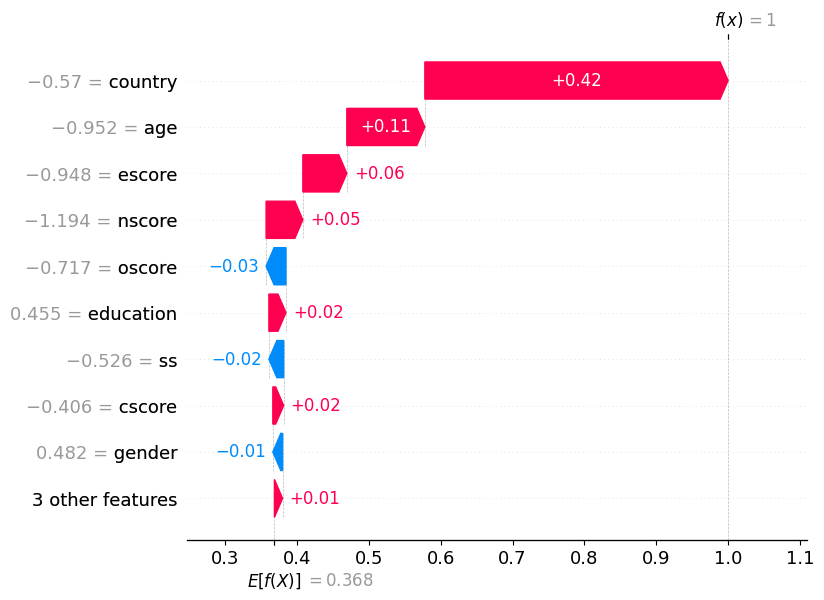

In [199]:
print("SHAP Summary for Best Chocolate Model (C1):")
shap.plots.waterfall(best_choco_shap_values_1[common_false_positive_idx_choco])

print("SHAP Summary for Worst Chocolate Model (C2):")
shap.plots.waterfall(worst_choco_shap_values_1[common_false_positive_idx_choco])

print("SHAP Summary for Best Mushroom Model (M1):")
shap.plots.waterfall(best_mushroom_shap_values_1[common_false_positive_idx_mushroom])

print("SHAP Summary for Worst Mushroom Model (M2):")
shap.plots.waterfall(worst_mushroom_shap_values_1[common_false_positive_idx_mushroom])

## SHAP Decision Plot for 4 Models

Decision Plot for Best Chocolate Model (RandomForest - C1):


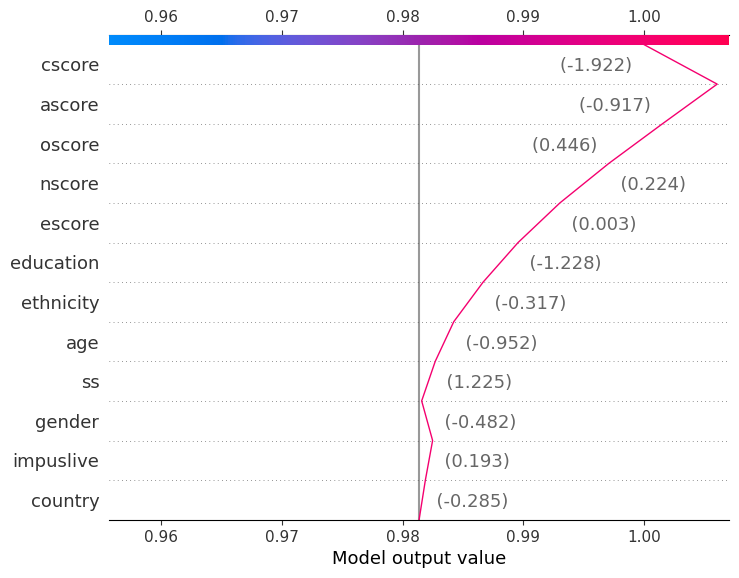

Decision Plot for Worst Chocolate Model (DecisionTree - C2):


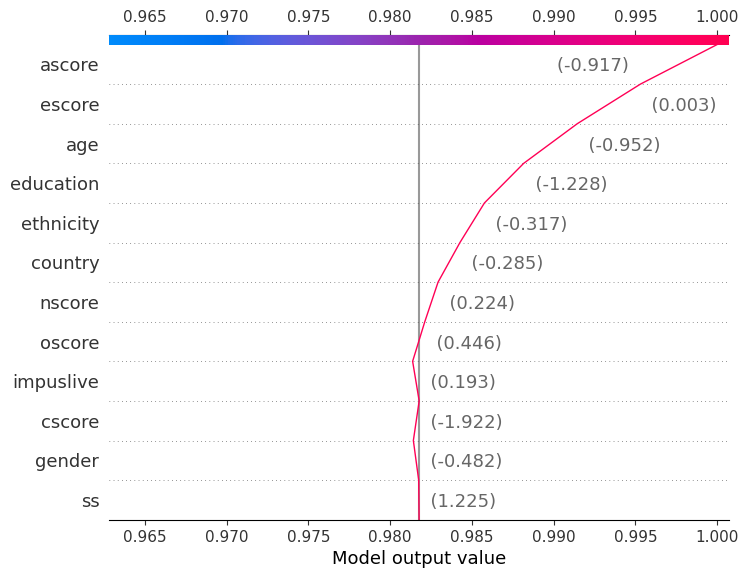

Decision Plot for Best Mushroom Model (SVC - M1):


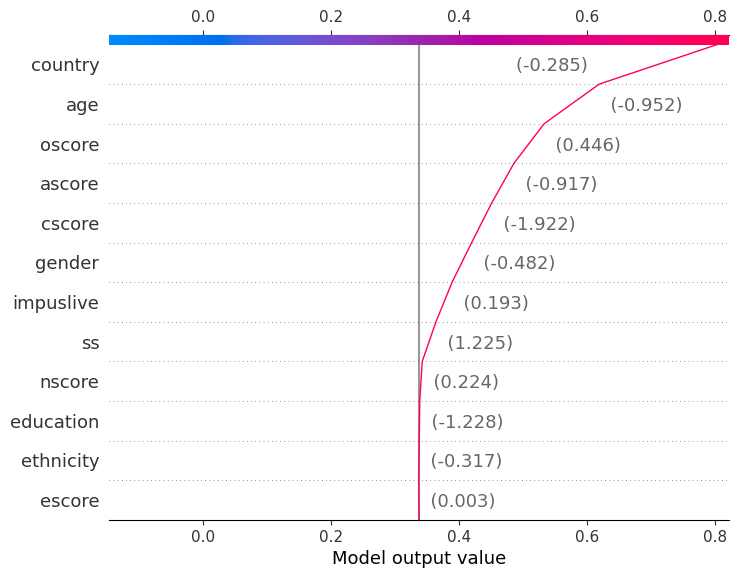

Decision Plot for Worst Mushroom Model (DecisionTree - M2):


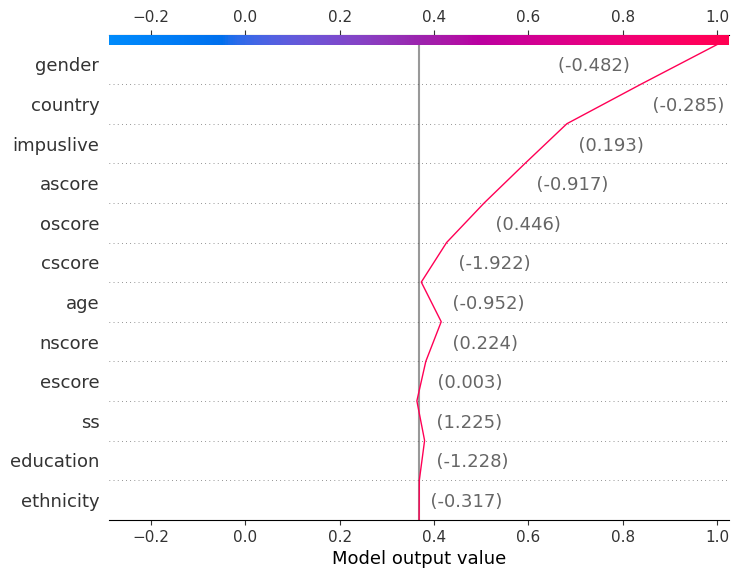

In [ ]:
# Chocolate test set (D1) - Best model (C1) Decision Plot
print("Decision Plot for Best Chocolate Model (RandomForest - C1):")
shap.decision_plot(explainer_best_choco.expected_value[1], best_choco_shap_values_1.values[:10], X_choco_test.iloc[:10])


# Chocolate test set (D1) - Worst model (C2) Decision Plot
print("Decision Plot for Worst Chocolate Model (DecisionTree - C2):")
shap.decision_plot(explainer_worst_choco.expected_value[1], worst_choco_shap_values_1.values[:10], X_choco_test.iloc[:10])


# Magic mushroom test set (D2) - Best model (M1) Decision Plot
print("Decision Plot for Best Mushroom Model (SVC - M1):")
shap.decision_plot(explainer_best_mushroom.expected_value[1], best_mushroom_shap_values_1.values[:10], X_choco_test.iloc[:10])

# Magic mushroom test set (D2) - Worst model (M2) Decision Plot
print("Decision Plot for Worst Mushroom Model (DecisionTree - M2):")
shap.decision_plot(explainer_worst_mushroom.expected_value[1], worst_mushroom_shap_values_1.values[:10], X_choco_test.iloc[:10])

